## Библиотеки

In [104]:
import numpy as np
import matplotlib.pyplot as plt

## Функции

In [105]:
def fill_C(): #Заполнить сетку ненулевыми лямбдами
    C11 = 12.98344389516936
    C12 = 2.76656283641825
    C16 = 5.00630996992227
    C22 = 79.21121100901908
    C26 = 4.88188079023485
    C66 = 13.05325089362048
    C = np.array([(C11, C12, C16),
                  (C12, C22, C26),
                  (C16, C26, C66)])
    return C
            
def Omega(q, Omega):
    return Omega * q

def Omega_inv(w, Omega_inv:
    return Omega_inv * w

## Переменные

In [113]:
L = 1 # масштаб координатных осей
M = 51 # количество узлов вдоль оси
#C =  np.ones((3, 3)) # Сетка лямбд
C = fill_C()
print("Matrix C =", '\n', C)
rho = 1.0
h = L / M # шаг по координате, h
T = 1.5 * L / abs(np.max(C)) # 1 полный оборот начального возмущения
dt = 0.4 * h / abs(np.max(C)) # коэффициент должен быть меньше единицы
step_1 = C * dt / h # комбинация коэффициентов при шаге первого порядка
data_current = np.zeros((M, M), dtype=[('vx', np.float64), ('vy', np.float64), # По умолчанию нулевые элекменты
                                  ('sxx', np.float64), ('syy', np.float64), ('sxy', np.float64)])
data_next = np.zeros((M, M), dtype=[('vx', np.float64), ('vy', np.float64),
                                  ('sxx', np.float64), ('syy', np.float64), ('sxy', np.float64)])

Matrix C = 
 [[12.9834439   2.76656284  5.00630997]
 [ 2.76656284 79.21121101  4.88188079]
 [ 5.00630997  4.88188079 13.05325089]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Численные вычисления матриц

In [107]:
import scipy.linalg as sci

In [108]:
Ax = np.array([[0,         0,         -1/rho, 0, 0     ],
               [0,         0,         0,      0, -1/rho],
               [-C[0][0], -C[0][2]/2, 0,      0, 0     ],
               [-C[0][1], -C[1][2]/2, 0,      0, 0     ],
               [-C[0][2], -C[2][2]/2, 0,      0, 0     ]])

Ay = np.array([[0,           0,       0, 0,      -1/rho],
               [0,           0,       0, -1/rho, 0     ],
               [-C[0][2]/2, -C[0][1], 0, 0,      0     ],
               [-C[1][2]/2, -C[1][1], 0, 0,      0     ],
               [-C[2][2]/2, -C[1][2], 0, 0,      0,    ]])
eigo_x = sci.eig(Ax) #Функция считает СВ и СЗ и сохраняет их в кортеж. Векторы в столбцы.
eigo_y = sci.eig(Ay)
Omegax_inv = eigo_x[1]
Omegay_inv = eigo_y[1]
Lamx = np.diag(eigo_x[0])
Lamx = Lamx.real #Берём действительную часть, мы же знаем, что у матрицы СЗ действительные
Lamy = np.diag(eigo_y[0])
Lamy = Lamy.real
Omegax = np.linalg.inv(Omegax_inv)
Omegay = np.linalg.inv(Omegay_inv)
print(Lamx, '\n', Omegax_inv, '\n', Omegax)
print(Ax, '\n', Omegax_inv * Lamx * Omegax)
print(np.linalg.inv(Omegax), '\n')
print(Lamy, '\n', Omegay_inv, '\n', Omegay)
print(Ay, '\n', Omegay_inv * Lamy * Omegay)
print(np.linalg.inv(Omegay))

[[ 0.          0.          0.          0.          0.        ]
 [ 0.         -3.81393346  0.          0.          0.        ]
 [ 0.          0.         -2.22799931  0.          0.        ]
 [ 0.          0.          0.          2.22799931  0.        ]
 [ 0.          0.          0.          0.          3.81393346]] 
 [[ 0.          0.209106   -0.11758778  0.11758778  0.209106  ]
 [ 0.          0.1305386   0.37672093 -0.37672093  0.1305386 ]
 [ 0.          0.79751635 -0.2619855  -0.2619855  -0.79751635]
 [ 1.          0.23522744  0.26671433  0.26671433 -0.23522744]
 [ 0.          0.49786552  0.83933397  0.83933397 -0.49786552]] 
 [[-4.91627378e-17 -4.48193053e-16 -8.08267223e-02  1.00000000e+00
  -3.42997863e-01]
 [ 2.00118743e+00  6.24640618e-01  5.24704339e-01  0.00000000e+00
   1.63778583e-01]
 [-6.93436908e-01  1.11079650e+00 -3.11237488e-01  0.00000000e+00
   4.98562318e-01]
 [ 6.93436908e-01 -1.11079650e+00 -3.11237488e-01  0.00000000e+00
   4.98562318e-01]
 [ 2.00118743e+00  6.246

Пока что произведение матриц не даёт исходную матрицу. Надо будет выяснить причину

## Начальные условия (актуально до ввода источника)

In [94]:
for j in range(M):
    for i in range(M):
        if (i > M / 3.0) and (i < 2.0 * M / 3.0) and (j > M / 3.0) and (j < 2.0 * M / 3.0):
            data_current[i, j]['sxx'] = 1.0
            data_current[i, j]['syy'] = 1.0
            data_current[i, j]['sxy'] = 0.0


## Расчёт

In [95]:
for k in range(int(T / dt)):
    # Шаг по X
    for j in range(M):
        for i in range(M):
            w_current = Omega((data_current[0], data_current[1], data_current[2], data_current[3], data_current[4], Omegax))
            if i == 0:       # Граница слева
                data_next[j, i]['q'] = data_current[j, i]['q'] - C[1, 1] * dt / h * (data_current[j, i]['q'] - data_current[j, M - 1]['q'])
            elif i == M - 1: # Граница справа
                
            else:            # Не граница
                data_next[j, i]['q'] = data_current[j, i]['q'] - C[1, 1] * dt / h * (data_current[j, i]['q'] - data_current[j, i - 1]['q'])
    # Шаг по Y
    for j in range(M):
        for i in range(M):
            if j == 0:       # Граница сверху
                data_current[j, i]['q'] = data_next[j, i]['q'] - C[1, 1] * dt / h * (data_next[j, i]['q'] - data_next[M - 1, i]['q'])
            elif j == M - 1: # Граница снизу
                
            else:            # Не граница
                data_current[j, i]['q'] = data_next[j, i]['q'] - C[1, 1] * dt / h * (data_next[j, i]['q'] - data_next[j - 1, i]['q'])

## Визуальное отображение

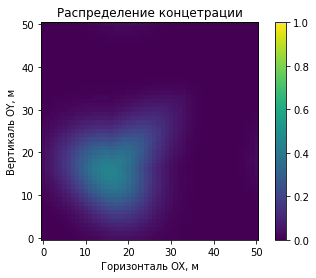

In [96]:
fig, ax = plt.subplots()
ax.set_title('Распределение концетрации')
_ = ax.set_xlabel('Горизонталь OX, м')
_ = ax.set_ylabel('Вертикаль OY, м')
img = ax.imshow(data_current['q'], vmin = 0, vmax = 1, origin = 'lower')
_ = fig.colorbar(img)